## 7.8 時間系列データの取り扱い

### 7.8.2 DatetimeIndexの作成

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

pd.set_option('display.notebook_repr_html', False)

# DatetimeIndex作成 – 範囲指定
dtidx1 = pd.date_range('2023-01-01', '2023-01-15')
dtidx1

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15'],
              dtype='datetime64[ns]', freq='D')

In [2]:
# DatetimeIndex作成 – freq指定
dtidx2 = pd.date_range('2023-01-01', periods=7, freq='W')
dtidx2

DatetimeIndex(['2023-01-01', '2023-01-08', '2023-01-15', '2023-01-22',
               '2023-01-29', '2023-02-05', '2023-02-12'],
              dtype='datetime64[ns]', freq='W-SUN')

In [3]:
# DatetimeIndex作成 - to_datetime関数
dtidx3 = pd.to_datetime( ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04'])
dtidx3

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04'], dtype='datetime64[ns]', freq=None)

### 7.8.3 PeriodIndexの作成

In [4]:
# PeriodIndex作成 – period_range関数
ridx1 = pd.period_range('2023-01-01', periods=7, freq='W')
ridx1

PeriodIndex(['2022-12-26/2023-01-01', '2023-01-02/2023-01-08',
             '2023-01-09/2023-01-15', '2023-01-16/2023-01-22',
             '2023-01-23/2023-01-29', '2023-01-30/2023-02-05',
             '2023-02-06/2023-02-12'],
            dtype='period[W-SUN]')

In [5]:
# PeriodIndex作成 – period_range関数
ridx2 = pd.period_range('2023-01-01', periods=7, freq='M')
ridx2

PeriodIndex(['2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
             '2023-07'],
            dtype='period[M]')

### 7.8.4 TimedeltaIndexの作成

In [6]:
# TimedeltaIndex作成 - timedelta_range関数
tdidx1 = pd.timedelta_range(start='0', end='2days', freq='4H')
tdidx1

TimedeltaIndex(['0 days 00:00:00', '0 days 04:00:00', '0 days 08:00:00',
                '0 days 12:00:00', '0 days 16:00:00', '0 days 20:00:00',
                '1 days 00:00:00', '1 days 04:00:00', '1 days 08:00:00',
                '1 days 12:00:00', '1 days 16:00:00', '1 days 20:00:00',
                '2 days 00:00:00'],
               dtype='timedelta64[ns]', freq='4H')

In [7]:
# TimedeltaIndex作成 - timedelta_range関数, left
pd.timedelta_range(start='0', end='2days', freq='4H', closed='left')

TimedeltaIndex(['0 days 00:00:00', '0 days 04:00:00', '0 days 08:00:00',
                '0 days 12:00:00', '0 days 16:00:00', '0 days 20:00:00',
                '1 days 00:00:00', '1 days 04:00:00', '1 days 08:00:00',
                '1 days 12:00:00', '1 days 16:00:00', '1 days 20:00:00'],
               dtype='timedelta64[ns]', freq='4H')

In [8]:
# TimedeltaIndex作成 - timedelta_range関数, right
pd.timedelta_range(start='0', end='2days', freq='4H', closed='right')

TimedeltaIndex(['0 days 04:00:00', '0 days 08:00:00', '0 days 12:00:00',
                '0 days 16:00:00', '0 days 20:00:00', '1 days 00:00:00',
                '1 days 04:00:00', '1 days 08:00:00', '1 days 12:00:00',
                '1 days 16:00:00', '1 days 20:00:00', '2 days 00:00:00'],
               dtype='timedelta64[ns]', freq='4H')

### 7.8.5 リサンプリング

In [9]:
# 簡単な時系列データの作成
data = {"name": np.arange(15), "val": np.random.randint(15, size=15)}
df1 = pd.DataFrame(data, index=dtidx1 )
df1.head()

            name  val
2023-01-01     0    8
2023-01-02     1   11
2023-01-03     2    3
2023-01-04     3    0
2023-01-05     4    9

#### resampleメソッド

In [10]:
# resampleを用いて、「週」単位で合計を計算
df1.resample('w').sum()

            name  val
2023-01-01     0    8
2023-01-08    28   33
2023-01-15    77   41

In [11]:
# groupbyを用いて、「週」単位で合計を計算
df1.groupby(df1.index.isocalendar().week).sum()

      name  val
week           
1       28   33
2       77   41
52       0    8

#### asfreqメソッド

In [12]:
df1

            name  val
2023-01-01     0    8
2023-01-02     1   11
2023-01-03     2    3
2023-01-04     3    0
2023-01-05     4    9
2023-01-06     5    1
2023-01-07     6    5
2023-01-08     7    4
2023-01-09     8    9
2023-01-10     9    0
2023-01-11    10   11
2023-01-12    11    3
2023-01-13    12    8
2023-01-14    13    4
2023-01-15    14    6

In [13]:
# asfreqを用いて「週」単位でデータ選択
df1.asfreq('W')

            name  val
2023-01-01     0    8
2023-01-08     7    4
2023-01-15    14    6

In [14]:
df1.asfreq('20H', normalize=False).head()

                     name  val
2023-01-01 00:00:00   0.0  8.0
2023-01-01 20:00:00   NaN  NaN
2023-01-02 16:00:00   NaN  NaN
2023-01-03 12:00:00   NaN  NaN
2023-01-04 08:00:00   NaN  NaN

In [15]:
df1.asfreq('20H', normalize=True).head()

            name  val
2023-01-01   0.0  8.0
2023-01-01   NaN  NaN
2023-01-02   NaN  NaN
2023-01-03   NaN  NaN
2023-01-04   NaN  NaN

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

act = pd.read_csv('OTg6QzA_activities.csv')
act.shape
act.head()

                 timestamp   X   Y   Z
0  2022-01-01 00:01:40.363  33  76  56
1  2022-01-01 00:01:42.961  34  87  56
2  2022-01-01 00:01:45.562  25  89  47
3  2022-01-01 00:01:48.163  11  70  50
4  2022-01-01 00:02:08.864  33  72  58

In [17]:
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66281 entries, 0 to 66280
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  66281 non-null  object
 1   X          66281 non-null  int64 
 2   Y          66281 non-null  int64 
 3   Z          66281 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 2.0+ MB


In [18]:
act.resample('D').mean() # 失敗. indexがない.

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [19]:
# 時間情報文字列をdatetime64データ型に変換する
act['new_time']  = pd.to_datetime(act['timestamp'],
                                  format='%Y-%m-%d %H:%M:%S.%f')

In [20]:
# infoメソッドで「列」情報を確認します。
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66281 entries, 0 to 66280
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  66281 non-null  object        
 1   X          66281 non-null  int64         
 2   Y          66281 non-null  int64         
 3   Z          66281 non-null  int64         
 4   new_time   66281 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.5+ MB


In [21]:
# RangeindexをDatetimeIndexに変更
act.set_index('new_time', inplace=True)
act.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 66281 entries, 2022-01-01 00:01:40.363000 to 2022-01-31 23:32:44.126000
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  66281 non-null  object
 1   X          66281 non-null  int64 
 2   Y          66281 non-null  int64 
 3   Z          66281 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 2.5+ MB


In [22]:
# 日単位のX, Y, Zの平均位置を計算する
act.resample('D').mean()

C:\Users\sunin\AppData\Local\Temp\ipykernel_16976\235220001.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  act.resample('D').mean()


                    X           Y           Z
new_time                                     
2022-01-01  45.181458  230.855784   79.015055
2022-01-02  33.717431  167.839047  104.839408
2022-01-03 -13.646741  187.623683  122.057785
2022-01-04  22.882040  278.679604   80.347032
2022-01-05  81.304762  182.480952  110.154762
2022-01-06  47.897631  193.845178   97.742809
2022-01-07  76.385113  134.345739  107.011866
2022-01-08  28.479100  387.379421   62.295016
2022-01-09  34.519963  288.278552   74.149489
2022-01-10  41.457949  304.729839   86.016705
2022-01-11  -6.569293  172.336113  132.938183
2022-01-12 -55.713615  127.607869  135.265817
2022-01-13 -59.560531  127.961396  127.032119
2022-01-14  -1.931100   98.227938   76.258613
2022-01-15 -33.231646  119.210264   99.346401
2022-01-16 -54.670087  131.400365  111.469220
2022-01-17   2.039523  111.096943   80.185682
2022-01-18 -19.387573  110.610192   95.699598
2022-01-19 -47.537708  149.645249  107.139123
2022-01-20 -55.645864  145.939822 

In [23]:
act.resample('D').count()

            timestamp     X     Y     Z
new_time                               
2022-01-01       1262  1262  1262  1262
2022-01-02       2771  2771  2771  2771
2022-01-03       3513  3513  3513  3513
2022-01-04       2628  2628  2628  2628
2022-01-05        420   420   420   420
2022-01-06       1182  1182  1182  1182
2022-01-07       1854  1854  1854  1854
2022-01-08       1244  1244  1244  1244
2022-01-09       1077  1077  1077  1077
2022-01-10       1736  1736  1736  1736
2022-01-11       3478  3478  3478  3478
2022-01-12       4473  4473  4473  4473
2022-01-13       3238  3238  3238  3238
2022-01-14       2119  2119  2119  2119
2022-01-15       1403  1403  1403  1403
2022-01-16       4386  4386  4386  4386
2022-01-17       1341  1341  1341  1341
2022-01-18       2237  2237  2237  2237
2022-01-19       3673  3673  3673  3673
2022-01-20       4038  4038  4038  4038
2022-01-21       3115  3115  3115  3115
2022-01-22       2768  2768  2768  2768
2022-01-23        285   285   285   285


In [24]:
act.resample('D').sum()

C:\Users\sunin\AppData\Local\Temp\ipykernel_16976\24447382.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  act.resample('D').sum()


                 X       Y       Z
new_time                          
2022-01-01   57019  291340   99717
2022-01-02   93431  465082  290510
2022-01-03  -47941  659122  428789
2022-01-04   60134  732370  211152
2022-01-05   34148   76642   46265
2022-01-06   56615  229125  115532
2022-01-07  141618  249077  198400
2022-01-08   35428  481900   77495
2022-01-09   37178  310476   79859
2022-01-10   71971  529011  149325
2022-01-11  -22848  599385  462359
2022-01-12 -249207  570790  605044
2022-01-13 -192857  414339  411330
2022-01-14   -4092  208145  161592
2022-01-15  -46624  167252  139383
2022-01-16 -239783  576322  488904
2022-01-17    2735  148981  107529
2022-01-18  -43370  247435  214080
2022-01-19 -174606  549647  393522
2022-01-20 -224698  589305  470399
2022-01-21 -124858  378532  326275
2022-01-22   25642  259237  224909
2022-01-23     -11   42416   23342
2022-01-24   -1272  204146  131902
2022-01-25   -7225  124122   84090
2022-01-26   -5498   27468   19617
2022-01-27    9369  

### 7.8.6 シフト(shift, tshift)

In [25]:
act.resample('d').mean()

C:\Users\sunin\AppData\Local\Temp\ipykernel_16976\13398565.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  act.resample('d').mean()


                    X           Y           Z
new_time                                     
2022-01-01  45.181458  230.855784   79.015055
2022-01-02  33.717431  167.839047  104.839408
2022-01-03 -13.646741  187.623683  122.057785
2022-01-04  22.882040  278.679604   80.347032
2022-01-05  81.304762  182.480952  110.154762
2022-01-06  47.897631  193.845178   97.742809
2022-01-07  76.385113  134.345739  107.011866
2022-01-08  28.479100  387.379421   62.295016
2022-01-09  34.519963  288.278552   74.149489
2022-01-10  41.457949  304.729839   86.016705
2022-01-11  -6.569293  172.336113  132.938183
2022-01-12 -55.713615  127.607869  135.265817
2022-01-13 -59.560531  127.961396  127.032119
2022-01-14  -1.931100   98.227938   76.258613
2022-01-15 -33.231646  119.210264   99.346401
2022-01-16 -54.670087  131.400365  111.469220
2022-01-17   2.039523  111.096943   80.185682
2022-01-18 -19.387573  110.610192   95.699598
2022-01-19 -47.537708  149.645249  107.139123
2022-01-20 -55.645864  145.939822 

In [26]:
act.resample('d').mean().shift(3, fill_value=0)

C:\Users\sunin\AppData\Local\Temp\ipykernel_16976\2352540695.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  act.resample('d').mean().shift(3, fill_value=0)


                    X           Y           Z
new_time                                     
2022-01-01   0.000000    0.000000    0.000000
2022-01-02   0.000000    0.000000    0.000000
2022-01-03   0.000000    0.000000    0.000000
2022-01-04  45.181458  230.855784   79.015055
2022-01-05  33.717431  167.839047  104.839408
2022-01-06 -13.646741  187.623683  122.057785
2022-01-07  22.882040  278.679604   80.347032
2022-01-08  81.304762  182.480952  110.154762
2022-01-09  47.897631  193.845178   97.742809
2022-01-10  76.385113  134.345739  107.011866
2022-01-11  28.479100  387.379421   62.295016
2022-01-12  34.519963  288.278552   74.149489
2022-01-13  41.457949  304.729839   86.016705
2022-01-14  -6.569293  172.336113  132.938183
2022-01-15 -55.713615  127.607869  135.265817
2022-01-16 -59.560531  127.961396  127.032119
2022-01-17  -1.931100   98.227938   76.258613
2022-01-18 -33.231646  119.210264   99.346401
2022-01-19 -54.670087  131.400365  111.469220
2022-01-20   2.039523  111.096943 

In [27]:
act.resample('d').mean().tshift(3)

C:\Users\sunin\AppData\Local\Temp\ipykernel_16976\4045743159.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  act.resample('d').mean().tshift(3)
C:\Users\sunin\AppData\Local\Temp\ipykernel_16976\4045743159.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  act.resample('d').mean().tshift(3)


                    X           Y           Z
new_time                                     
2022-01-04  45.181458  230.855784   79.015055
2022-01-05  33.717431  167.839047  104.839408
2022-01-06 -13.646741  187.623683  122.057785
2022-01-07  22.882040  278.679604   80.347032
2022-01-08  81.304762  182.480952  110.154762
2022-01-09  47.897631  193.845178   97.742809
2022-01-10  76.385113  134.345739  107.011866
2022-01-11  28.479100  387.379421   62.295016
2022-01-12  34.519963  288.278552   74.149489
2022-01-13  41.457949  304.729839   86.016705
2022-01-14  -6.569293  172.336113  132.938183
2022-01-15 -55.713615  127.607869  135.265817
2022-01-16 -59.560531  127.961396  127.032119
2022-01-17  -1.931100   98.227938   76.258613
2022-01-18 -33.231646  119.210264   99.346401
2022-01-19 -54.670087  131.400365  111.469220
2022-01-20   2.039523  111.096943   80.185682
2022-01-21 -19.387573  110.610192   95.699598
2022-01-22 -47.537708  149.645249  107.139123
2022-01-23 -55.645864  145.939822 

In [28]:
act.resample('d').mean().shift(freq="3D")

C:\Users\sunin\AppData\Local\Temp\ipykernel_16976\3070876606.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  act.resample('d').mean().shift(freq="3D")


                    X           Y           Z
new_time                                     
2022-01-04  45.181458  230.855784   79.015055
2022-01-05  33.717431  167.839047  104.839408
2022-01-06 -13.646741  187.623683  122.057785
2022-01-07  22.882040  278.679604   80.347032
2022-01-08  81.304762  182.480952  110.154762
2022-01-09  47.897631  193.845178   97.742809
2022-01-10  76.385113  134.345739  107.011866
2022-01-11  28.479100  387.379421   62.295016
2022-01-12  34.519963  288.278552   74.149489
2022-01-13  41.457949  304.729839   86.016705
2022-01-14  -6.569293  172.336113  132.938183
2022-01-15 -55.713615  127.607869  135.265817
2022-01-16 -59.560531  127.961396  127.032119
2022-01-17  -1.931100   98.227938   76.258613
2022-01-18 -33.231646  119.210264   99.346401
2022-01-19 -54.670087  131.400365  111.469220
2022-01-20   2.039523  111.096943   80.185682
2022-01-21 -19.387573  110.610192   95.699598
2022-01-22 -47.537708  149.645249  107.139123
2022-01-23 -55.645864  145.939822 

C:\Users\sunin\AppData\Local\Temp\ipykernel_16976\2887927394.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  act.resample('d').mean()['X'].plot(style=":", label="X", figsize=(10,8))
C:\Users\sunin\AppData\Local\Temp\ipykernel_16976\2887927394.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  act.resample('d').mean()['X'].shift(3, fill_value=50).plot(
C:\Users\sunin\AppData\Local\Temp\ipykernel_16976\2887927394.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only

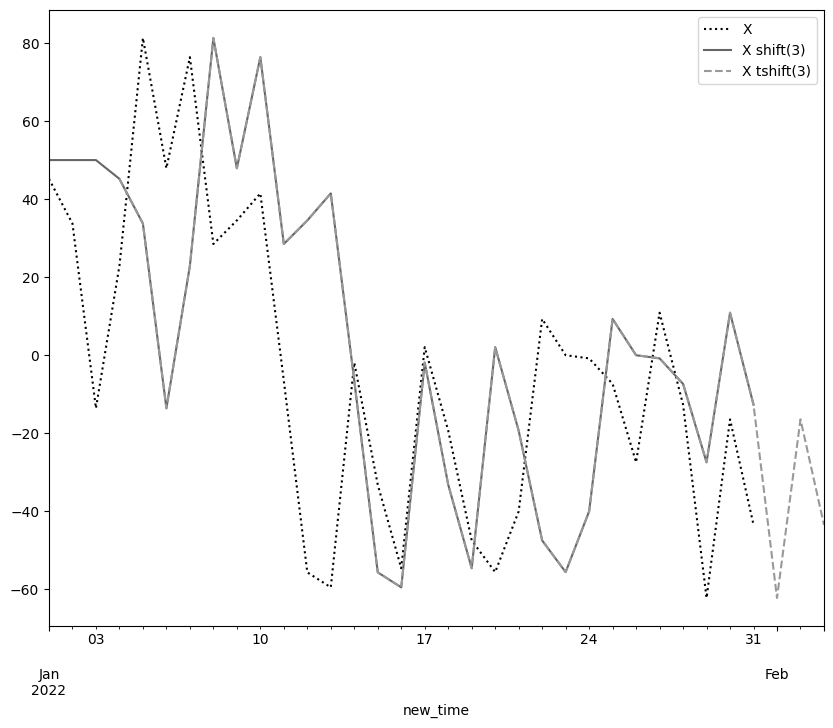

In [29]:
plt.style.use('grayscale')
plt.figure(facecolor='white')
act.resample('d').mean()['X'].plot(style=":", label="X", figsize=(10,8))
act.resample('d').mean()['X'].shift(3, fill_value=50).plot(
  style="-", label="X shift(3)")
act.resample('d').mean()['X'].tshift(3).plot(
  style="--", label="X tshift(3)")
plt.legend(loc="best")
plt.show()